In [1]:
import sys
sys.path


['C:\\Users\\ERGÜL\\jupyter notebook',
 'C:\\anaconda\\python312.zip',
 'C:\\anaconda\\DLLs',
 'C:\\anaconda\\Lib',
 'C:\\anaconda',
 '',
 'C:\\anaconda\\Lib\\site-packages',
 'C:\\anaconda\\Lib\\site-packages\\win32',
 'C:\\anaconda\\Lib\\site-packages\\win32\\lib',
 'C:\\anaconda\\Lib\\site-packages\\Pythonwin']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("customer.csv")


In [4]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.replace(" ",np.nan, inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

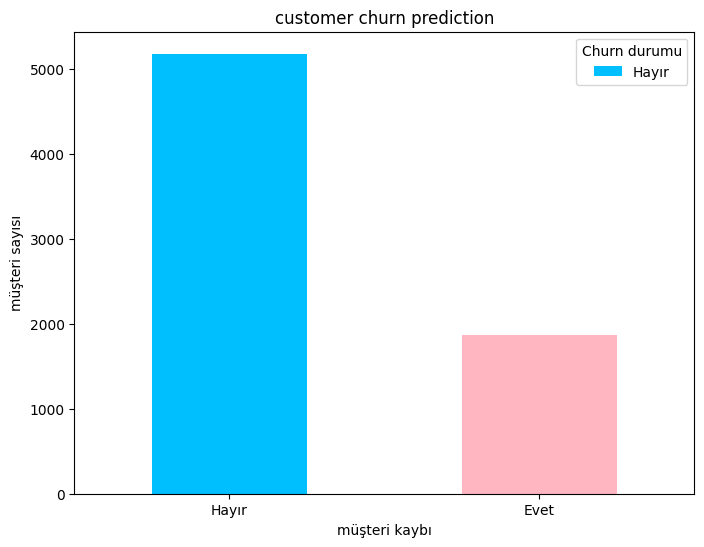

In [8]:
plt.figure(figsize=(8, 6))
df["Churn"].value_counts().plot(kind="bar", color=["deepskyblue", "lightpink"])
plt.title("customer churn prediction")
plt.xlabel("müşteri kaybı")
plt.ylabel("müşteri sayısı")
plt.xticks([0, 1], ["Hayır", "Evet"], rotation=0)
plt.legend(["Hayır", "Evet"], title="Churn durumu")
plt.show()

In [9]:
df1 = df.drop(columns=df.columns.difference(df.columns))

In [25]:
df["gender"]=df["gender"].map({"Male":0,"Female":1})

In [26]:
df["Churn"]=df["Churn"].map({"No":0,"Yes":1})

In [27]:
df1.corr()["Churn"].sort_values()

ValueError: could not convert string to float: 'Female'

In [14]:
from sklearn.preprocessing import LabelEncoder

In [19]:
columnsEncode=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
labelEncoder=LabelEncoder()
for column in columnsEncode:
    df[column]=labelEncoder.fit_transform(df[column])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,DSL,0,2,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,2,0,2,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,2,2,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,1,DSL,2,0,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,2,DSL,2,0,2,2,2,2,One year,1,Mailed check,84.80,1990.5,0
7039,1,0,1,1,72,1,2,Fiber optic,0,2,2,0,2,2,One year,1,Credit card (automatic),103.20,7362.9,0
7040,1,0,1,1,11,0,1,DSL,2,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,2,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:

features = df.drop("Churn",axis=1)
scaler=StandardScaler()
fScaled=scaler.fit_transform(features)
df_scaled=pd.DataFrame(fScaled,columns=features.columns)
df_scaled["Churn"]=df["Churn"]
df_scaled.head()

ValueError: could not convert string to float: 'DSL'